# Annotations and Images

- Identify the most frequent classes of traffic signs.
- Create a list of available images for each class

In [20]:
# %load nbheader.py
%load_ext autoreload
%autoreload 2

import os
import json
import cv2
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from helper import (
    imshow,
    load_and_scale,
    load_annotations,
)

DATAPATH = "/data/project/MSA8395/mapillary_traffic_sign_dataset/"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
file_path = f"{DATAPATH}/mtsd_v2_fully_annotated"
os.listdir(f"{file_path}/annotations/")[:10]

['--48MAqc82-bZdgGpaiexA.json',
 '--7fWq6WjZM8L1eUSuvOEA.json',
 '--A4b2SOWVi4KL_ryAAtTg.json',
 '--FValmNpFJ8yo8X7uWODA.json',
 '--L1OMr84-e5nOLbNH5sBA.json',
 '--USokD3k9HzZbwzNZntiQ.json',
 '--taWRWc4f2YUe5w1q9Qew.json',
 '--tczNya4_w5IhU9DeRMHw.json',
 '--vWKSR3Rh8quTfK4AuKOQ.json',
 '--yfp7vRX6P9KIETw9QdRQ.json']

In [6]:
import glob
glob.glob(f"{file_path}/annotations/*.json")[:10]

['/data/project/MSA8395/mapillary_traffic_sign_dataset//mtsd_v2_fully_annotated/annotations/--48MAqc82-bZdgGpaiexA.json',
 '/data/project/MSA8395/mapillary_traffic_sign_dataset//mtsd_v2_fully_annotated/annotations/--7fWq6WjZM8L1eUSuvOEA.json',
 '/data/project/MSA8395/mapillary_traffic_sign_dataset//mtsd_v2_fully_annotated/annotations/--A4b2SOWVi4KL_ryAAtTg.json',
 '/data/project/MSA8395/mapillary_traffic_sign_dataset//mtsd_v2_fully_annotated/annotations/--FValmNpFJ8yo8X7uWODA.json',
 '/data/project/MSA8395/mapillary_traffic_sign_dataset//mtsd_v2_fully_annotated/annotations/--L1OMr84-e5nOLbNH5sBA.json',
 '/data/project/MSA8395/mapillary_traffic_sign_dataset//mtsd_v2_fully_annotated/annotations/--USokD3k9HzZbwzNZntiQ.json',
 '/data/project/MSA8395/mapillary_traffic_sign_dataset//mtsd_v2_fully_annotated/annotations/--taWRWc4f2YUe5w1q9Qew.json',
 '/data/project/MSA8395/mapillary_traffic_sign_dataset//mtsd_v2_fully_annotated/annotations/--tczNya4_w5IhU9DeRMHw.json',
 '/data/project/MSA8395/

In [7]:
mtsd_v2_fully_annotated_df = load_annotations(f"{DATAPATH}/mtsd_v2_fully_annotated")

Loading from disk: mtsd_v2_fully_annotated.csv
Number of records: 206,386


In [8]:
mtsd_v2_partially_annotated_df = load_annotations(f"{DATAPATH}/mtsd_v2_partially_annotated")

Loading from disk: mtsd_v2_partially_annotated.csv
Number of records: 96,613


In [9]:
mtsd_v2_fully_annotated_df.head(3).T

0  \
key                                    489lm30wc63tjtupe1e2q1   
label                                              other-sign   
bbox        {'xmin': 2657.890625, 'ymin': 1013.0859375, 'x...   
properties  {'barrier': False, 'occluded': True, 'out-of-f...   
file_name   /data/project/MSA8395/mapillary_traffic_sign_d...   
slug                                   --48MAqc82-bZdgGpaiexA   

                                                            1  \
key                                    jwoggy96u43g4ad6o09ee2   
label                                              other-sign   
bbox        {'xmin': 2641.640625, 'ymin': 1028.3203125, 'x...   
properties  {'barrier': False, 'occluded': False, 'out-of-...   
file_name   /data/project/MSA8395/mapillary_traffic_sign_d...   
slug                                   --48MAqc82-bZdgGpaiexA   

                                                            2  
key                                    iw8oed2vtpa46rfvmki2wk  
label                              regulatory--keep-right--g1  
bbox        {'xmin': 2187.65625, 'ymin': 1669.6875, 'xmax'...  
properties  {'barrier': False, 'occluded': False, 'out-of-...  
file_name   /data/project/MSA8395/mapillary_traffic_sign_d...  
slug                                   --7fWq6WjZM8L1eUSuvOEA

## Most frequent Labels:

In [10]:
df = mtsd_v2_fully_annotated_df.groupby("label") \
    .agg({"key": "count"}) \
    .reset_index()
df[df.label != "other-sign"] \
    .sort_values('key', ascending=False) \
    .head(5)

label   key
265                  regulatory--yield--g1  2775
80   information--pedestrians-crossing--g1  2187
165               regulatory--no-entry--g1  2048
3          complementary--chevron-left--g1  1796
8         complementary--chevron-right--g1  1775

In [11]:
df2 = mtsd_v2_partially_annotated_df.groupby("label") \
    .agg({"key": "count"}) \
    .reset_index()
df2[df2.label != "other-sign"] \
    .sort_values('key', ascending=False) \
    .head(5)

label   key
261                  regulatory--yield--g1  2241
77   information--pedestrians-crossing--g1  2049
237                   regulatory--stop--g1  1137
324      warning--pedestrians-crossing--g4   894
184             regulatory--no-parking--g1   891

In [12]:
label_list = df[df.label != "other-sign"] \
    .sort_values('key', ascending=False) \
    .head(5) \
    .label.values
print(', '.join(label_list))

regulatory--yield--g1, information--pedestrians-crossing--g1, regulatory--no-entry--g1, complementary--chevron-left--g1, complementary--chevron-right--g1


In [13]:
label_list2 = df2[df2.label != "other-sign"] \
    .sort_values('key', ascending=False) \
    .head(5) \
    .label.values
print(', '.join(label_list2))

regulatory--yield--g1, information--pedestrians-crossing--g1, regulatory--stop--g1, warning--pedestrians-crossing--g4, regulatory--no-parking--g1


In [14]:
image_list = glob.glob(f"{DATAPATH}/images/*.jpg")
print(f"Number of images: {len(image_list):,}")

Number of images: 25,540


In [15]:
images_df = pd.DataFrame(
    {
        "slug": map(lambda f: os.path.basename(f).split('.')[0], image_list),
        "file_name": image_list
    }
)
print(f"Number of records: {images_df.shape[0]:,}")

Number of records: 25,540


## How many images are available?

In [16]:
available_fully_annotated_df = pd.merge(
    mtsd_v2_fully_annotated_df,
    images_df,
    on = "slug", how = "inner", suffixes=["_json", "_jpg"]
)

In [57]:
available_fully_annotated_df.head(5).T

0  ...                                                  4
key                                        SNR9JR0bT6qzNzGhkhzJ2w  ...                             lhz74apuv7qoxas4bb01h5
label                             warning--road-narrows-right--g2  ...                            warning--turn-right--g1
bbox            {'xmin': 3023.015625, 'ymin': 1562.203125, 'xm...  ...  {'xmin': 2079.1171875, 'ymin': 1993.95703125, ...
properties      {'barrier': False, 'occluded': False, 'out-of-...  ...  {'barrier': False, 'occluded': False, 'out-of-...
file_name_json  /data/project/MSA8395/mapillary_traffic_sign_d...  ...  /data/project/MSA8395/mapillary_traffic_sign_d...
slug                                       KBHWtP_x8LIL4MASnBEEXQ  ...                             KBKRhhE_I6Mr6fzsQcVPiQ
file_name_jpg   /data/project/MSA8395/mapillary_traffic_sign_d...  ...  /data/project/MSA8395/mapillary_traffic_sign_d...

[7 rows x 5 columns]

In [58]:
print(f"Number of records: {available_fully_annotated_df.shape[0]:,}")

Number of records: 60,274


## Look at some samples

In [40]:
subset_df = available_fully_annotated_df[available_fully_annotated_df.label=='information--pedestrians-crossing--g1']
subset_df.shape
sample_set_df = subset_df.sample(12)

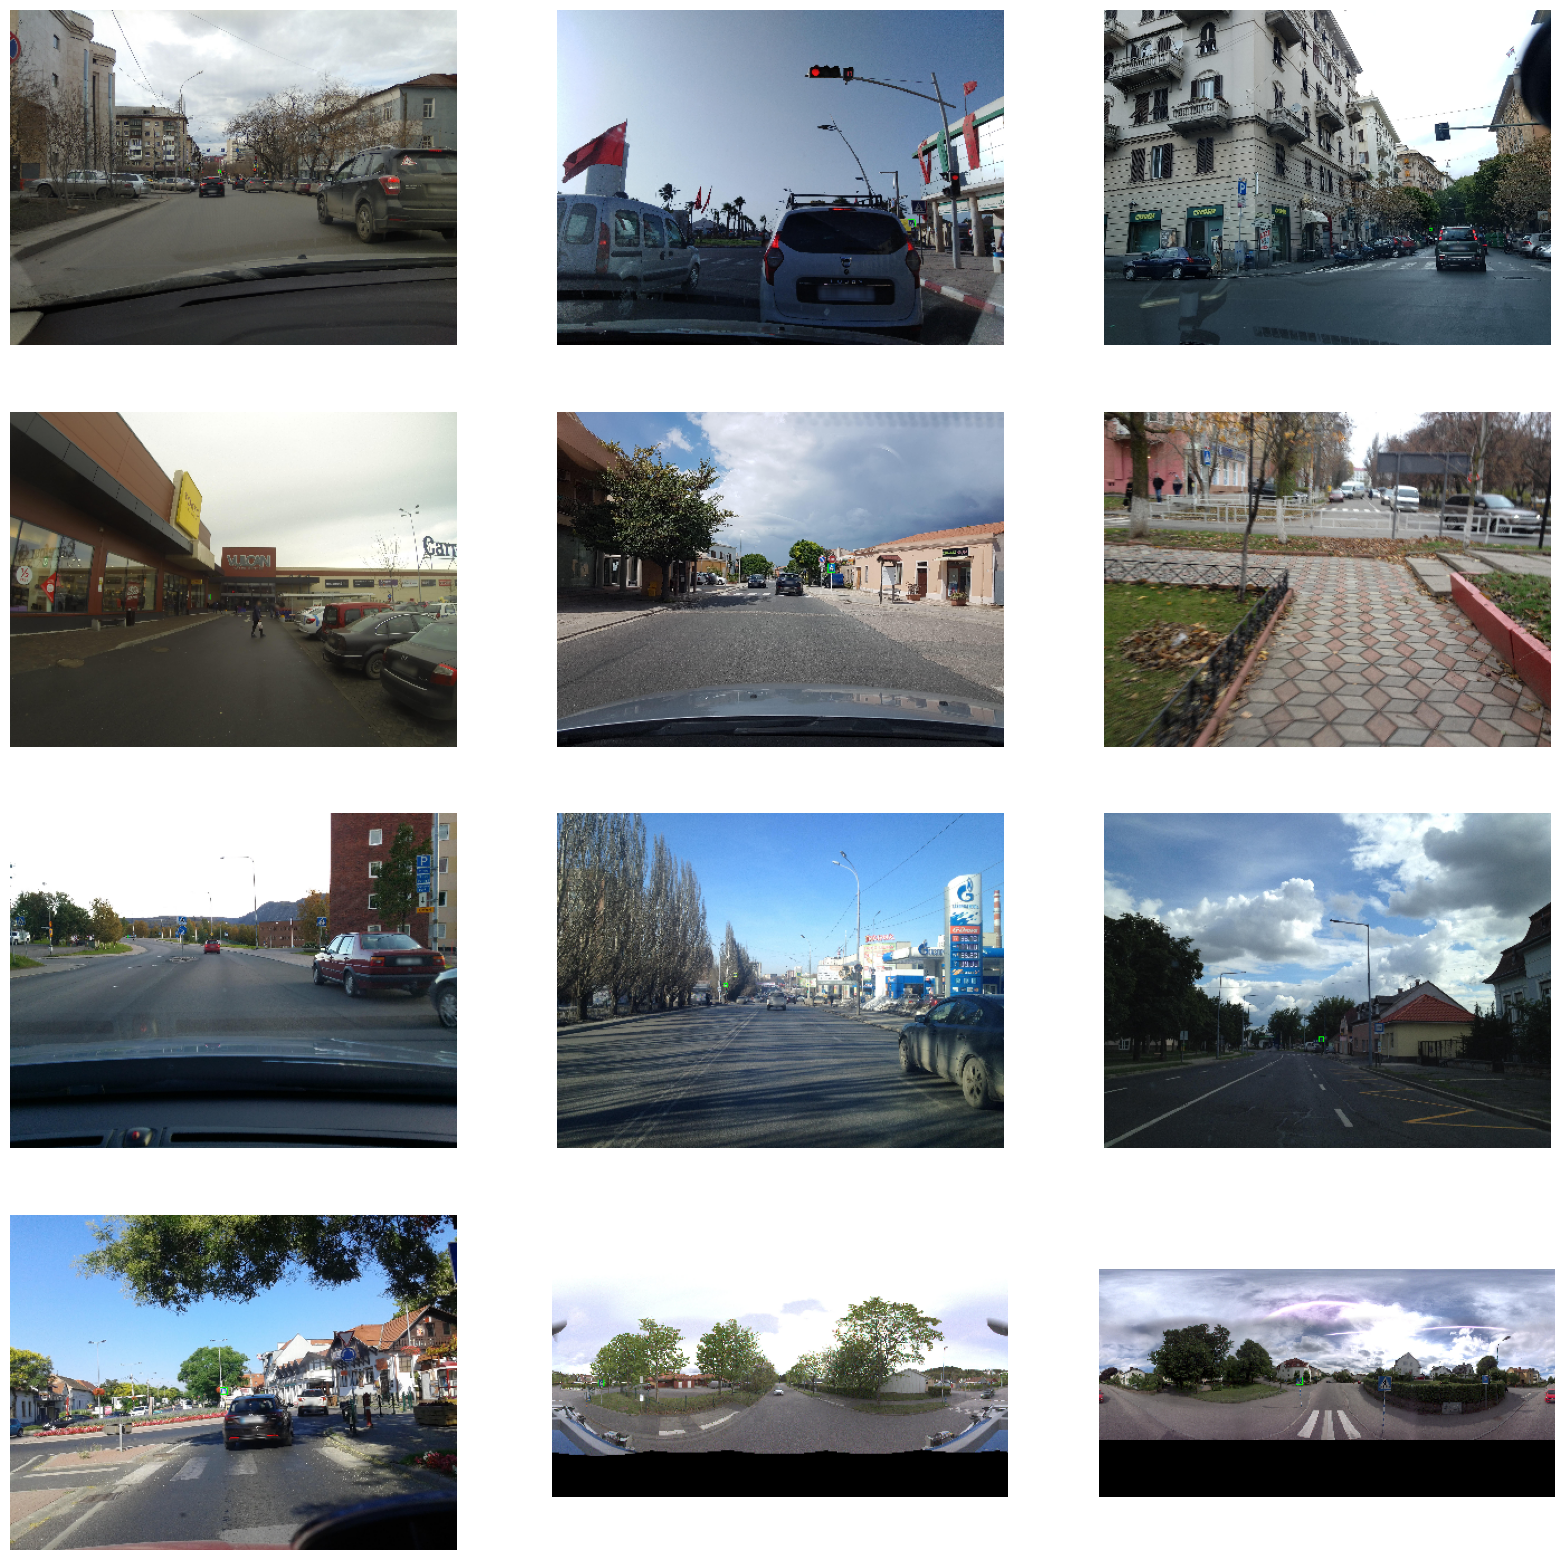

In [41]:
fig = plt.figure(figsize=(20, 20))
for j, (_, row) in enumerate(sample_set_df.iterrows()):
    # print(f"{j}:{row.file_name_jpg}")
    # img = load_and_scale(row.file_name_jpg, 200)
    img = cv2.imread(row.file_name_jpg)
    bbox = json.loads(row.bbox.replace("'", '"'))
    img2 = cv2.rectangle(img,
                         (int(bbox['xmin']), int(bbox['ymin'])), (int(bbox['xmax']), int(bbox['ymax'])),
                         (0, 255, 0), 3) 
    plt.subplot(4, 3, j+1)
    imshow(img2)
plt.show()

## Let's see what these cropped signs look like

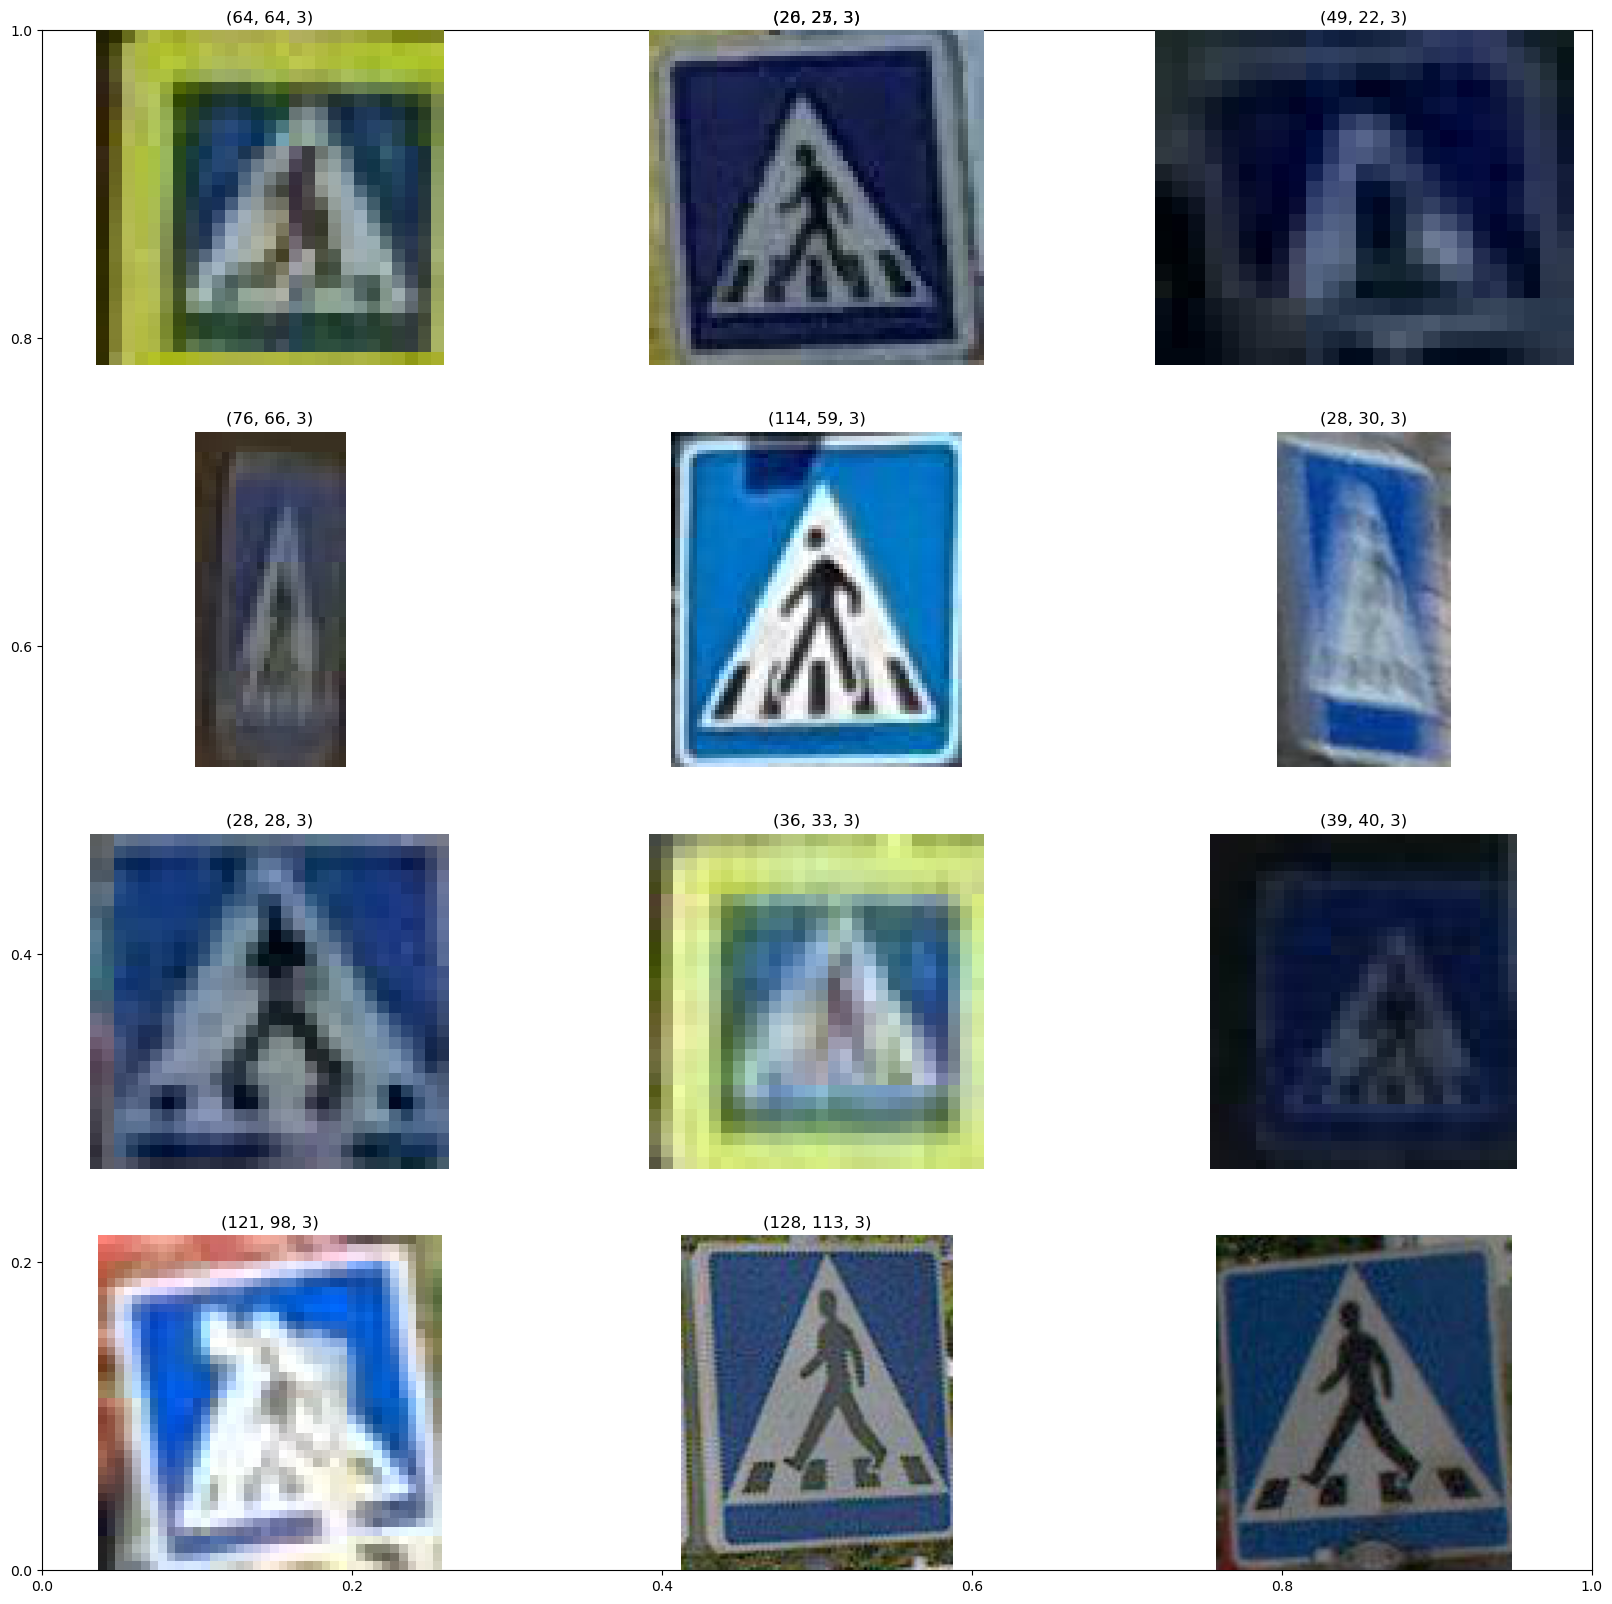

In [49]:
fig = plt.figure(figsize=(20, 20))
for j, (_, row) in enumerate(sample_set_df.iterrows()):
    # print(f"{j}:{row.file_name_jpg}")
    # img = load_and_scale(row.file_name_jpg, 200)
    img = cv2.imread(row.file_name_jpg)
    bbox = json.loads(row.bbox.replace("'", '"'))
    # img2 = img[int(bbox['xmin']):int(bbox['xmax']), int(bbox['ymin']):int(bbox['ymax']),:].copy()
    img2 = img[int(bbox['ymin']):int(bbox['ymax']), int(bbox['xmin']):int(bbox['xmax']),:].copy()
    
    plt.title(img2.shape)
    plt.subplot(4, 3, j+1)
    imshow(img2)
plt.show()

In [25]:
row.properties

"{'barrier': False, 'occluded': False, 'out-of-frame': False, 'exterior': False, 'ambiguous': False, 'included': False, 'direction-or-information': False, 'highway': False, 'dummy': False}"

In [26]:
row.bbox

"{'xmin': 1728.421875, 'ymin': 1596.9375, 'xmax': 1773.84375, 'ymax': 1647.73828125}"

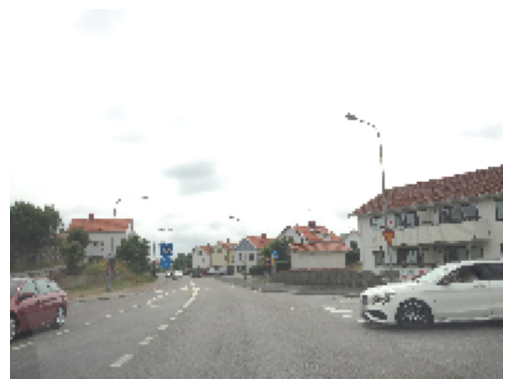

In [28]:
imshow(img)

In [32]:
bbox = json.loads(row.bbox.replace("'", '"'))
bbox

{'xmin': 1728.421875,
 'ymin': 1596.9375,
 'xmax': 1773.84375,
 'ymax': 1647.73828125}

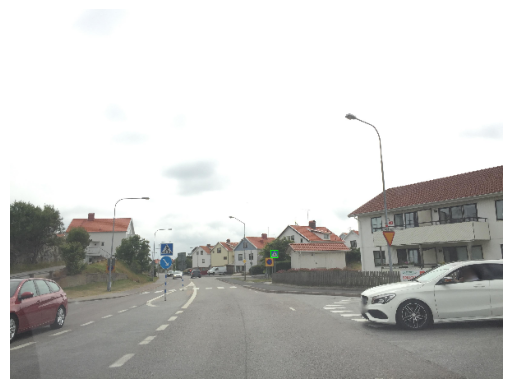

In [37]:
img_orig = cv2.imread(row.file_name_jpg)
img2 = cv2.rectangle(img_orig,
                     (int(bbox['xmin']), int(bbox['ymin'])), (int(bbox['xmax']), int(bbox['ymax'])),
                     (0, 255, 0), 3) 
imshow(img2, max_dim=600)

In [33]:
help(cv2.rectangle, (bbox['xmin'], bbox['ymin']), (bbox['xmax'], bbox['ymax']), 1)

Help on built-in function rectangle:

rectangle(...)
    rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
    .   @brief Draws a simple, thick, or filled up-right rectangle.
    .
    .   The function cv::rectangle draws a rectangle outline or a filled rectangle whose two opposite corners
    .   are pt1 and pt2.
    .
    .   @param img Image.
    .   @param pt1 Vertex of the rectangle.
    .   @param pt2 Vertex of the rectangle opposite to pt1 .
    .   @param color Rectangle color or brightness (grayscale image).
    .   @param thickness Thickness of lines that make up the rectangle. Negative values, like #FILLED,
    .   mean that the function has to draw a filled rectangle.
    .   @param lineType Type of the line. See #LineTypes
    .   @param shift Number of fractional bits in the point coordinates.



    rectangle(img, rec, color[, thickness[, lineType[, shift]]]) -> img
    .   @overload
    .
    .   use `rec` parameter as alternative specification of